In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Dependencies**

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn.preprocessing import StandardScaler

# **Data Analysis**

### Load data

In [ ]:
# train_data_csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Internshalla/Train_VWXNENq.csv')

# test_data_csv
data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Internshalla/Test_3UxFOGW.csv')

# To get the final csv file with prediction
solution = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Internshalla/Sample_Submission_JdZWaxb.csv')

### Explore data and check some statistics

In [ ]:
data.shape

(9527, 23)

In [ ]:
data.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced'],
      dtype='object')

In [ ]:
data.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9527 non-null   object 
 1   Office_PIN                   9527 non-null   int64  
 2   Application_Receipt_Date     9527 non-null   object 
 3   Applicant_City_PIN           9430 non-null   float64
 4   Applicant_Gender             9460 non-null   object 
 5   Applicant_BirthDate          9454 non-null   object 
 6   Applicant_Marital_Status     9454 non-null   object 
 7   Applicant_Occupation         8306 non-null   object 
 8   Applicant_Qualification      9441 non-null   object 
 9   Manager_DOJ                  8844 non-null   object 
 10  Manager_Joining_Designation  8844 non-null   object 
 11  Manager_Current_Designation  8844 non-null   object 
 12  Manager_Grade                8844 non-null   float64
 13  Manager_Status    

In [ ]:
data_test.shape

(5045, 22)

In [ ]:
data_test.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2'],
      dtype='object')

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           5045 non-null   object 
 1   Office_PIN                   5045 non-null   int64  
 2   Application_Receipt_Date     5045 non-null   object 
 3   Applicant_City_PIN           5011 non-null   float64
 4   Applicant_Gender             5023 non-null   object 
 5   Applicant_BirthDate          5022 non-null   object 
 6   Applicant_Marital_Status     5015 non-null   object 
 7   Applicant_Occupation         4041 non-null   object 
 8   Applicant_Qualification      5001 non-null   object 
 9   Manager_DOJ                  4221 non-null   object 
 10  Manager_Joining_Designation  4221 non-null   object 
 11  Manager_Current_Designation  4221 non-null   object 
 12  Manager_Grade                4221 non-null   float64
 13  Manager_Status    

The ID column is irrelevant to the data and has no significant value that can contribute to classification, so removing it from the data.

In [ ]:
data = data.drop(columns=['ID'], axis =1)
data_test = data_test.drop(columns=['ID'], axis =1)

### Checking whether data is balance or not

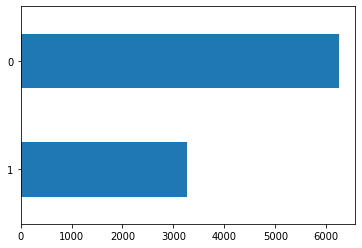

In [ ]:
data['Business_Sourced'].value_counts().sort_values().plot(kind = 'barh')

From the above graph, it is clear that ytraining data is highly imbalanced.

### Handling the Missing Value

#### Numerical Variable

In [ ]:
float_col = data.select_dtypes(include='float64').columns

for i in float_col:
  data[i] = data[i].interpolate(method='linear')
  data_test[i] = data_test[i].interpolate(method='linear')

Here, Linear Interpolation is used to handle the missing value in Numerical variables because Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilizes non-missing values from adjacent data points to compute a value for a missing data point.

#### Categorical Variable

In [ ]:
cat_col = data.select_dtypes(include='object').columns

for i in cat_col:
  data[i] = data[i].fillna(data_test[i].mode()[0])
  data_test[i] = data_test[i].fillna(data_test[i].mode()[0])

Here, *mode* (most frequent category) is used to replace missing value in Categorical Variable.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Office_PIN                   9527 non-null   int64  
 1   Application_Receipt_Date     9527 non-null   object 
 2   Applicant_City_PIN           9527 non-null   float64
 3   Applicant_Gender             9527 non-null   object 
 4   Applicant_BirthDate          9527 non-null   object 
 5   Applicant_Marital_Status     9527 non-null   object 
 6   Applicant_Occupation         9527 non-null   object 
 7   Applicant_Qualification      9527 non-null   object 
 8   Manager_DOJ                  9527 non-null   object 
 9   Manager_Joining_Designation  9527 non-null   object 
 10  Manager_Current_Designation  9527 non-null   object 
 11  Manager_Grade                9527 non-null   float64
 12  Manager_Status               9527 non-null   object 
 13  Manager_Gender    

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Office_PIN                   5045 non-null   int64  
 1   Application_Receipt_Date     5045 non-null   object 
 2   Applicant_City_PIN           5045 non-null   float64
 3   Applicant_Gender             5045 non-null   object 
 4   Applicant_BirthDate          5045 non-null   object 
 5   Applicant_Marital_Status     5045 non-null   object 
 6   Applicant_Occupation         5045 non-null   object 
 7   Applicant_Qualification      5045 non-null   object 
 8   Manager_DOJ                  5045 non-null   object 
 9   Manager_Joining_Designation  5045 non-null   object 
 10  Manager_Current_Designation  5045 non-null   object 
 11  Manager_Grade                5045 non-null   float64
 12  Manager_Status               5045 non-null   object 
 13  Manager_Gender    

### Handling *DateTime* columns

In [ ]:
date_col = ['Manager_DoB', 'Manager_DOJ', 'Application_Receipt_Date', 'Applicant_BirthDate']

for i in date_col:
  data[i] = pd.to_datetime(data[i])
  data[i] = data[i].map(dt.datetime.toordinal)

  data_test[i] = pd.to_datetime(data_test[i])
  data_test[i] = data_test[i].map(dt.datetime.toordinal)  

Here, all the columns with date is handeled by ***datetime object*** which provides different set of tools using which we can perform all the necessary tasks for date-time columns.

### Handling Categorical Variable

In [ ]:
one_hot_col = []

for i in cat_col:
  length = len(data[i].unique())
  print(f"Unique values for Column {i} : {length}")
  if length < 12:
    one_hot_col.append(i)

Unique values for Column Application_Receipt_Date : 357
Unique values for Column Applicant_Gender : 2
Unique values for Column Applicant_BirthDate : 5836
Unique values for Column Applicant_Marital_Status : 4
Unique values for Column Applicant_Occupation : 5
Unique values for Column Applicant_Qualification : 11
Unique values for Column Manager_DOJ : 647
Unique values for Column Manager_Joining_Designation : 8
Unique values for Column Manager_Current_Designation : 5
Unique values for Column Manager_Status : 2
Unique values for Column Manager_Gender : 2
Unique values for Column Manager_DoB : 1246


Here, for all the variables which have less than 12 unique values are converted using ***one-hot encoding*** and all other variables only contain ***date*** which is handeled already above.

In [ ]:
data = pd.get_dummies(data, columns = one_hot_col)
data_test = pd.get_dummies(data_test, columns = one_hot_col)

train_col = data.columns
test_col = data_test.columns

for i in train_col:
  if i not in test_col:
    data_test[i] = [0] * 5045

data_test = data_test.drop(columns=['Business_Sourced'], axis =1)

Convert all these variabless into dummy variable.

In [ ]:
for i in test_col:
  if i not in train_col:
    data[i] = [0] * 9527

If the column is present in test dataset but not in train, that column is added in train dataset by setting values to ***0***.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 54 columns):
 #   Column                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                      --------------  -----  
 0   Office_PIN                                                                                                  9527 non-null   int64  
 1   Application_Receipt_Date                                                                                    9527 non-null   int64  
 2   Applicant_City_PIN                                                                                          9527 non-null   float64
 3   Applicant_BirthDate                                                                                         9527 non-null   int64  
 4   Manager_DOJ                                                       

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 53 columns):
 #   Column                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                      --------------  -----  
 0   Office_PIN                                                                                                  5045 non-null   int64  
 1   Application_Receipt_Date                                                                                    5045 non-null   int64  
 2   Applicant_City_PIN                                                                                          5045 non-null   float64
 3   Applicant_BirthDate                                                                                         5045 non-null   int64  
 4   Manager_DOJ                                                       

## Standard Scaler (Standarizing the Data)

In [ ]:
x = data.drop(columns='Business_Sourced', axis=1)
y = data['Business_Sourced']

data_test = data_test.values

In [ ]:
x.shape

(9527, 53)

In [ ]:
data_test.shape

(5045, 53)

In [ ]:
scaler = StandardScaler()

x = scaler.fit_transform(x)
data_test = scaler.transform(data_test)

# Train the Model

## Random Forest

I have decided to use Random Forest instead of other Algorithms that was available. Becasue it works better in case of imbalanced dataset compared to other algorithm.

In [ ]:
rf =  ensemble.RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=101, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=175,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.fit(x, y)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=101, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=175,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict(data_test)

In [ ]:
df = pd.DataFrame(list(zip(solution['ID'].tolist(), list(y_pred))), columns= ['ID', 'Business_Sourced'])
df.to_csv('Sample Solution ensemble RF.csv', index=False)

One of the reasons why RF didn't performed well is that more number of features and less amount data. RF needs more data to learn as it has many parameters.